In [34]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

In [35]:
dados = pd.read_json('dados_notas_col.json')
print(dados.id.nunique())
print(dados.shape)
dados.head(3)

6395
(6395, 34)


,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,cep,classe,data,descricao,descricao_area_residencial,descricao_companhia_domiciliar,descricao_encaminhamento,descricao_historico,descricao_historico_disciplina,descricao_imovel,descricao_mae_escolaridade,descricao_pai_escolaridade,descricao_raca,descricao_responsavel_escolaridade,descricao_responsavel_financeiro,descricao_situacao_matricula_periodo,descricao_trabalho_responsavel,id,media_final,nome_escola_ensino_fundamental,percentual_frequencia,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,professores,qnt_pc,qtd_pessoas_domicilio,renda_bruta_familiar,sigla
0,86,-1,87,-1,2016,2016,59067-400,1,05/05/2017,Matriculado,Urbana,Pais,Diálogo com professor(a),Técnico de Nível Médio em Edificações,Língua Portuguesa e Literatura I(90H),Financiado,Pós graduação incompleto,Pós graduação completo,Parda,Pós graduação completo,Pai,Aprovado,Serviço público,496915657473,86,Complexo Educacional Contemporâneo,85.0,06/12/2001,M,[1521],NaN,4,9000.0,CNAT
100002,69,-1,5,-1,2015,2016,59795-000,1,None,Matriculado,Urbana,Mãe,None,"Técnico de Nivel Médio em Agropecuária, na For...",Língua Portuguesa e Literatura I(90H),Alugado,Ensino fundamental incompleto,Ensino médio completo,Branca,Ensino médio completo,Pai,Dependência,Autônomo,458905053917,69,Escola Estadual António Francisco,92.0,16/12/1999,M,"[2688, 3538, 1222]",0.0,3,500.0,AP
100021,83,-1,77,-1,2016,2016,59200-000,1,None,Matriculado,Urbana,Pais,None,Técnico de Nivel Médio Informática,Língua Portuguesa e Literatura I(90H),Alugado,Ensino médio completo,Ensino médio incompleto,Branca,Ensino médio completo,Pai,Aprovado,Autônomo,496533683389,83,IESC,99.0,01/06/2000,F,"[1592, 3388]",0.0,7,2500.0,SC


In [36]:
del dados['descricao_historico_disciplina']
del dados['professores']
del dados['id']
del dados['media_final']
del dados['percentual_frequencia']
del dados['nome_escola_ensino_fundamental']
del dados['qnt_pc']

#colocar novamente
del dados['cep']
del dados['data']
del dados['pessoa_fisica__nascimento_data']

#descricao_encaminhamento colocar booleano

#dados que fazem a indicação se o aluno foi evadido ou não
del dados['descricao']

In [37]:
y = dados.classe
X = dados

del X['classe']
X.shape


(6395, 22)

In [38]:
dados_dummies = pd.get_dummies(X, drop_first=False)
dados_dummies.shape

(6395, 175)

In [39]:
dados_dummies.head(2)

dados_clean = dados_dummies.replace([np.inf, -np.inf], np.nan)
dados_clean = dados_clean.dropna(axis=1, how='all')

dados_clean.shape

(6395, 175)

In [40]:
np.isfinite( dados_clean ).all()

LnguaPortuguesaeLiteraturaI90H                                                    True
LnguaPortuguesaeLiteraturaII90H                                                   True
MatemticaI120H                                                                    True
MatemticaII90H                                                                    True
ano_letivo__ano                                                                   True
ano_letivo__ano_matricula_periodo                                                 True
qtd_pessoas_domicilio                                                             True
renda_bruta_familiar                                                              True
descricao_area_residencial_Comunidade Indígena                                    True
descricao_area_residencial_Comunidade Quilombola                                  True
descricao_area_residencial_Não informado                                          True
descricao_area_residencial_Rural           

In [41]:
model = RandomForestClassifier()
clf = model.fit(dados_clean, y)

In [42]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


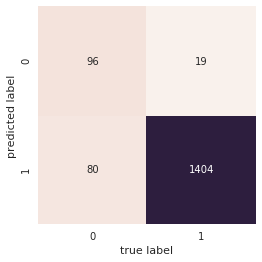

In [43]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [13]:
"""
from sklearn.tree import export_graphviz
from sklearn import tree

export_graphviz(clf,
                feature_names=X.columns,
                filled=True,
                rounded=True)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
"""

'\nfrom sklearn.tree import export_graphviz\nfrom sklearn import tree\n\nexport_graphviz(clf,\n                feature_names=X.columns,\n                filled=True,\n                rounded=True)\n\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("iris") \n'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


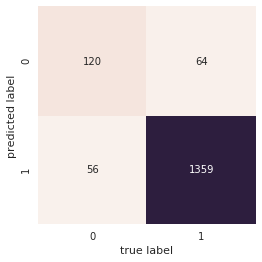

In [44]:
model = DecisionTreeClassifier()
clf = model.fit(dados_clean, y)

from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)
model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [45]:
export_graphviz(clf,
                feature_names=dados_clean.columns,
                filled=True,
                rounded=True, 
                out_file='tree.dot')

In [46]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

0

In [47]:
%matplotlib inline
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

'tree.pdf'

In [48]:
dados_clean.head(5)

,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,qtd_pessoas_domicilio,renda_bruta_familiar,descricao_area_residencial_Comunidade Indígena,descricao_area_residencial_Comunidade Quilombola,descricao_area_residencial_Não informado,descricao_area_residencial_Rural,descricao_area_residencial_Urbana,descricao_companhia_domiciliar_Cônjuge,descricao_companhia_domiciliar_Mãe,descricao_companhia_domiciliar_Não informado,descricao_companhia_domiciliar_Outros,descricao_companhia_domiciliar_Pai,descricao_companhia_domiciliar_Pais,descricao_companhia_domiciliar_Parente(s) ou amigo(s),descricao_companhia_domiciliar_Sozinho(a),descricao_encaminhamento_Atendimento domiciliar,descricao_encaminhamento_Contato telefônico com os pais ou responsáveis,descricao_encaminhamento_Diálogo com aluno(a) e professor(a),descricao_encaminhamento_Diálogo com o(s) aluno(s),descricao_encaminhamento_Diálogo com pais ou responsáveis,descricao_encaminhamento_Diálogo com professor(a),descricao_encaminhamento_Elaboração de rotina de estudos,descricao_encaminhamento_Envio de Telegrama ou e-mail aos pais ou responsáveis,descricao_encaminhamento_Orientação para cancelamento de matrícula​,descricao_encaminhamento_Orientação para trancamento compulsório de matrícula,descricao_encaminhamento_Orientação para transferência de Curso/Campus,descricao_encaminhamento_Solicitação de Aplicação/Registro de medida disciplinar,descricao_encaminhamento_Solicitação de atendimento da Assistência Social,descricao_encaminhamento_Solicitação de atendimento da Psicologia,descricao_encaminhamento_Solicitação de atendimento do Setor de saúde,descricao_encaminhamento_Solicitação de comparecimento dos pais ou responsáveis à escola,descricao_historico_Técnico de Nivel Médio Informática,"descricao_historico_Técnico de Nivel Médio em Agropecuária, na Forma Integrada",descricao_historico_Técnico de Nivel Médio em Biocombustíveis,descricao_historico_Técnico de Nivel Médio em Equipamentos Biomédicos,descricao_historico_Técnico de Nivel Médio em Informática,descricao_historico_Técnico de Nível Médio em Administração,descricao_historico_Técnico de Nível Médio em Agroecologia,descricao_historico_Técnico de Nível Médio em Alimentos,descricao_historico_Técnico de Nível Médio em Apicultura,descricao_historico_Técnico de Nível Médio em Comércio,descricao_historico_Técnico de Nível Médio em Controle Ambiental,descricao_historico_Técnico de Nível Médio em Edificações,descricao_historico_Técnico de Nível Médio em Eletromecânica,descricao_historico_Técnico de Nível Médio em Eletrotécnica,descricao_historico_Técnico de Nível Médio em Eletrônica,descricao_historico_Técnico de Nível Médio em Eventos,descricao_historico_Técnico de Nível Médio em Geologia,descricao_historico_Técnico de Nível Médio em Informática,descricao_historico_Técnico de Nível Médio em Informática para Internet,descricao_historico_Técnico de Nível Médio em Lazer,descricao_historico_Técnico de Nível Médio em Logística,descricao_historico_Técnico de Nível Médio em Manutenção e Suporte em Informática,descricao_historico_Técnico de Nível Médio em Mecatrônica,descricao_historico_Técnico de Nível Médio em Mecânica,descricao_historico_Técnico de Nível Médio em Meio Ambiente,descricao_historico_Técnico de Nível Médio em Mineração,descricao_historico_Técnico de Nível Médio em Multimídia,descricao_historico_Técnico de Nível Médio em Química,"descricao_historico_Técnico de Nível Médio em Química, na Forma Integrado",descricao_historico_Técnico de Nível Médio em Recursos Pesqueiros,descricao_historico_Técnico de Nível Médio em Refrigeração e Climatização,descricao_historico_Técnico de Nível Médio em Têxtil,descricao_historico_Técnico de Nível Médio em Vestuário,descricao_historico_Técnico em Programação de Jogos Digitais,descricao_imovel_Alugado,descricao_imovel_Cedido ou Emprestado,descricao_imovel_Financiado,descricao_imovel_Não informado,descricao_imovel_Outr